*****LOADING & WRANGLING DATA*****

In [255]:
import pandas as pd
data = pd.read_csv('insurance.csv')

data['smoker'].replace("yes", 1, inplace = True)
data['smoker'].replace("no", 0, inplace = True)

data['sex'].replace("male",1,inplace=True)
data['sex'].replace("female",0,inplace=True)

data['region'].replace("southwest",1,inplace=True)
data['region'].replace("southeast",2,inplace=True)
data['region'].replace("northwest",3,inplace=True)
data['region'].replace("northeast",4,inplace=True)



def min_max(sample_data,col):
        sample_data[col] = sample_data[col]/sample_data[col].max()

min_max(data,'bmi')
min_max(data,'age')
min_max(data,'children')
min_max(data,'region')
min_max(data,'charges')

data.head()

,age,sex,bmi,children,smoker,region,charges
0,0.296875,0,0.525127,0.0,1,0.25,0.264777
1,0.281250,1,0.635611,0.2,0,0.50,0.027059
2,0.437500,1,0.621118,0.6,0,0.50,0.069773
3,0.515625,1,0.427348,0.0,0,0.75,0.344744
4,0.500000,1,0.543572,0.0,0,0.75,0.060637


*****EXPLORATORY DATA ANALYSIS*****

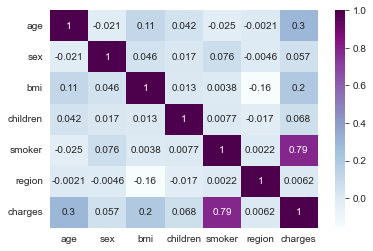

In [256]:
import seaborn as sb
import matplotlib.pyplot as mp
corr = data.corr()
dataplot = sb.heatmap(corr,cmap='BuPu', annot=True)
mp.show()

<AxesSubplot:xlabel='age', ylabel='charges'>

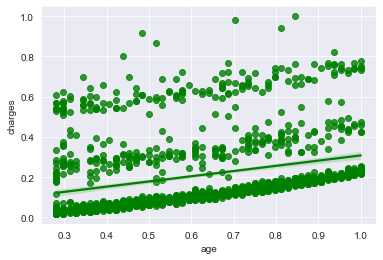

In [257]:
sb.regplot(x="age",y="charges", data=data, color="green")

<AxesSubplot:xlabel='bmi', ylabel='charges'>

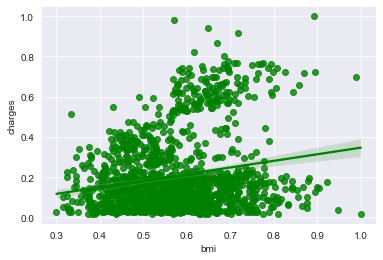

In [258]:
sb.regplot(x="bmi",y="charges", data=data, color="green")

<AxesSubplot:xlabel='region', ylabel='charges'>

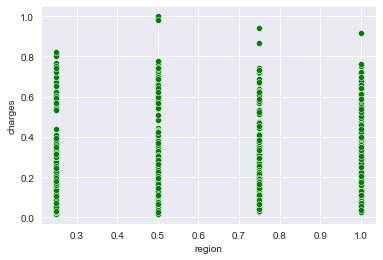

In [259]:
sb.scatterplot(x="region",y="charges", data=data, color="green")

<AxesSubplot:xlabel='sex', ylabel='charges'>

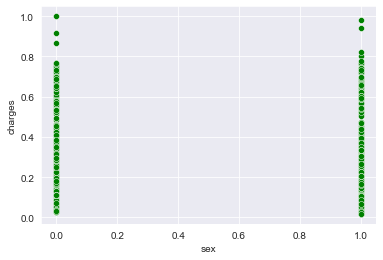

In [260]:
sb.scatterplot(x="sex",y="charges", data=data, color="green")

<AxesSubplot:xlabel='children', ylabel='charges'>

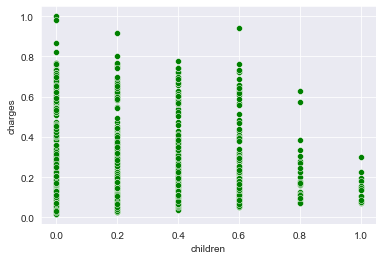

In [261]:
sb.scatterplot(x="children",y="charges", data=data, color="green")

<AxesSubplot:xlabel='smoker', ylabel='charges'>

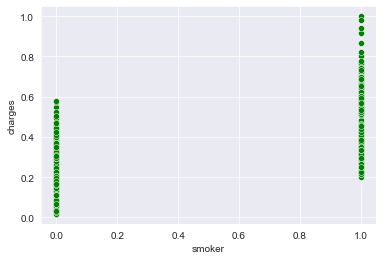

In [262]:
sb.scatterplot(x="smoker",y="charges", data=data, color="green")

*****SPLITTING DATA INTO TRAIN & TEST*****

In [263]:
from sklearn.model_selection import train_test_split
X = data[['age','smoker','region','bmi', 'children']].values
y = data['charges'].values
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
print(X_train.shape)
print(y_train.shape)

(1003, 5)
(1003,)


*****BUILDING A MODEL*****

In [264]:
from sklearn.linear_model import LinearRegression,SGDRegressor, BayesianRidge

liny = LinearRegression()
liny.fit(X_train, y_train)
print("linear-->", liny.score(X_test,y_test))


sgd = SGDRegressor()
sgd.fit(X_train,y_train)
print("sgd-->",sgd.score(X_test,y_test))


bayes = BayesianRidge()
bayes.fit(X_train,y_train)
print("bayes-->",bayes.score(X_test,y_test))

linear--> 0.7670014305844611
sgd--> 0.6975693210217325
bayes--> 0.7670151527299222
